In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [2]:
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

### SalePrice: 
Es el precio de venta de la casa. Variable target. 

In [5]:
variable_target = df['SalePrice']
variable_target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Probability'>

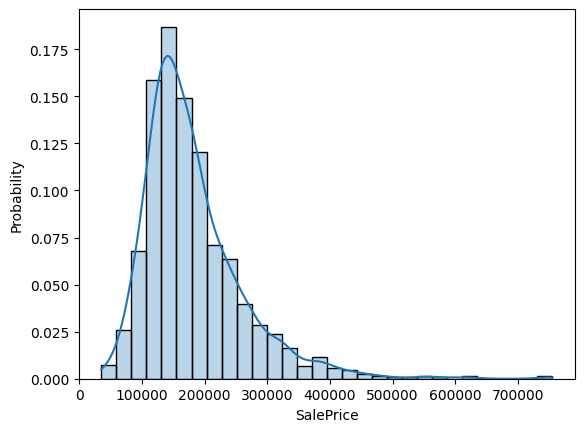

In [6]:
# Histograma variable target 
plt.figure()
sns.histplot(data = df,
             x = 'SalePrice',
             bins = 30,            
             alpha = 0.3,
             kde = True,
             stat='probability')

# Outliers

In [7]:
# Metodo 1: IQR 
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

# Limites: 
limite_inf = primer_cuartil - (2 * rango_intercuartilico)
limite_sup = tercer_cuartil + (2 * rango_intercuartilico)

print(limite_inf,limite_sup)

-38075.0 382050.0


In [8]:
print(primer_cuartil,tercer_cuartil,rango_intercuartilico)

129975.0 214000.0 84025.0


In [9]:
# Identifico outliers: 
df['Otlier_IQR'] = np.where((df['SalePrice'] < limite_inf) | (df['SalePrice'] > limite_sup),1,0)
df['Otlier_IQR'].value_counts()

Otlier_IQR
0    1422
1      38
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo IQR')

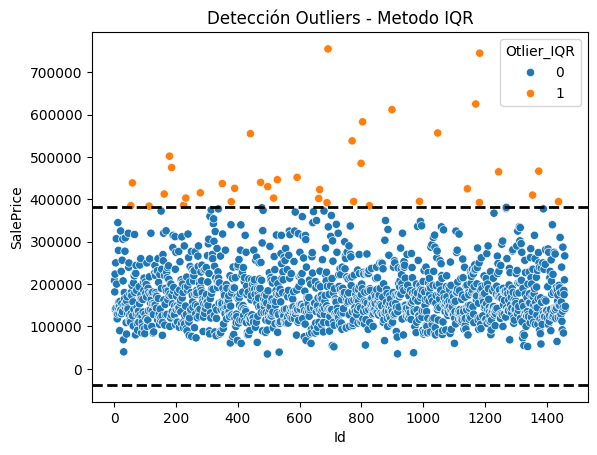

In [10]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'Id',
                y = 'SalePrice',
               hue = 'Otlier_IQR')
plt.axhline(y = limite_inf, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo IQR')

In [11]:
# Metodo 2: Z-Score 
media = variable_target.mean()
desvio = variable_target.std()
valores_z = (variable_target - media)/desvio

# Limites: 
limite_inf = (-3)
limite_sup = 3

print(valores_z)

0       0.347154
1       0.007286
2       0.535970
3      -0.515105
4       0.869545
          ...   
1455   -0.074534
1456    0.366036
1457    1.077242
1458   -0.488356
1459   -0.420697
Name: SalePrice, Length: 1460, dtype: float64


In [12]:
# Identifico outliers: 
df['Otlier_ZScore'] = np.where((valores_z < limite_inf) | (valores_z > limite_sup),1,0)
df['Otlier_ZScore'].value_counts()

Otlier_ZScore
0    1438
1      22
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo Z Score')

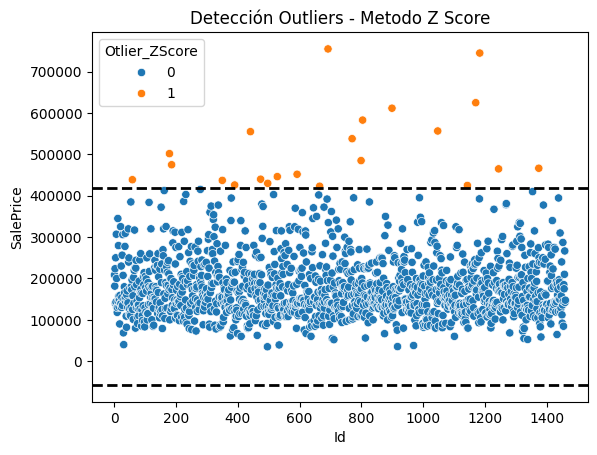

In [13]:
limite_inf_tr = limite_inf * desvio + media
limite_sup_tr = limite_sup * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'Id',
                y = 'SalePrice',
               hue = 'Otlier_ZScore')
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Z Score')

In [14]:
# Metodo 3: Distancia Media 
media = variable_target.mean()
MAD = sum(abs(variable_target - media)) / variable_target.count()

# Limites: 
limite_inf = media - (3 * MAD)
limite_sup = media + (3 * MAD)

print(MAD,limite_inf,limite_sup)

57434.770275849274 8616.885062863119 353225.5067179588


In [15]:
# Identifico outliers: 
df['Otlier_DistanciaMedia'] = np.where((df['SalePrice'] < limite_inf) | (df['SalePrice'] > limite_sup),1,0)
df['Otlier_DistanciaMedia'].value_counts()

Otlier_DistanciaMedia
0    1406
1      54
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo Distancia de la Media')

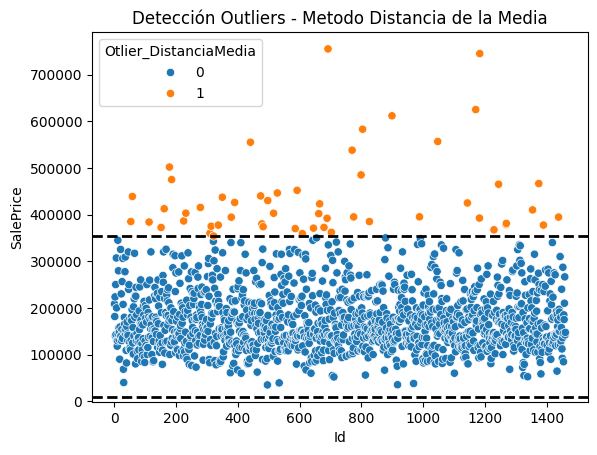

In [16]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'Id',
                y = 'SalePrice',
               hue = 'Otlier_DistanciaMedia')
plt.axhline(y = limite_inf, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Distancia de la Media')

# Outliers: Análisis Multivariado

### GarageArea: 
Size of garage in square feet. 

In [17]:
# Correlación 
df[['GarageArea','SalePrice']].corr(method='pearson')

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


In [18]:
# Metodo 3: Distancia Media Multivariado
# Defino función: 
def outlier_euclideano_d(x,cutoff):
  # x: dataframe con valors numericos normalizados 
  result_ = pd.Series([0] * len(x.iloc[:,1]))
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana 
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > cutoff))] = 1
  return result_

In [19]:
# Aplicar la funcion
df['Otlier_DistanciaMedia_Mult'] = outlier_euclideano_d(df[['GarageArea','SalePrice']],3)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Otlier_IQR,Otlier_ZScore,Otlier_DistanciaMedia,Otlier_DistanciaMedia_Mult
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,0,0,0,0


In [20]:
df['Otlier_DistanciaMedia_Mult'].value_counts()

Otlier_DistanciaMedia_Mult
0    1434
1      26
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo Distancia de la Media - Multivariado')

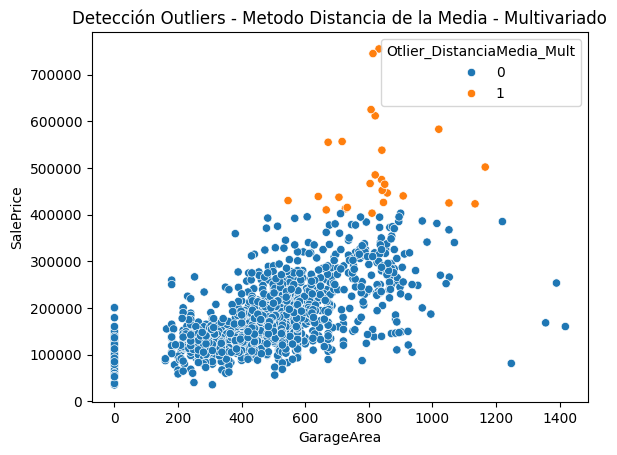

In [21]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'GarageArea',
                y = 'SalePrice',
               hue = 'Otlier_DistanciaMedia_Mult')
plt.title('Detección Outliers - Metodo Distancia de la Media - Multivariado')

# Missing Values

### MasVnrArea: 
Masonry veneer area in square feet. Se refiere a la superficie o área de un revestimiento de mampostería en pies cuadrados. La mampostería se refiere al uso de ladrillos, bloques, piedra u otros materiales similares para cubrir o revestir una estructura de construcción. 

In [22]:
# Tiene valores faltantes?
df['MasVnrArea'].isnull().value_counts()

MasVnrArea
False    1452
True        8
Name: count, dtype: int64

In [23]:
# Descripcion de la variable: 
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [24]:
# Tratamiento: usando SimpleImputer
from sklearn.impute import SimpleImputer

valores = df['MasVnrArea'] # numpy array con los valores
imputador = SimpleImputer(missing_values = np.nan, 
                          strategy = 'median') # definir el imputador
# Transformar el dataset
transformados = imputador.fit_transform(valores.values.reshape(-1, 1))

In [25]:
# Genero la columna extra: 
df['MasVnrArea_Comp'] = pd.Series(transformados.flatten())
df.loc[df['MasVnrArea'].isnull(),['MasVnrArea','MasVnrArea_Comp']]

,MasVnrArea,MasVnrArea_Comp
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0


In [26]:
# Y si hubiese querido reemplazar con la media? 
imputador = SimpleImputer(missing_values = np.nan, 
                          strategy = 'mean') # definir el imputador
# Transformar el dataset
transformados = imputador.fit_transform(valores.values.reshape(-1, 1))

In [27]:
# Genero la columna extra: 
df['MasVnrArea_Comp_2'] = pd.Series(transformados.flatten())
df.loc[df['MasVnrArea'].isnull(),['MasVnrArea','MasVnrArea_Comp','MasVnrArea_Comp_2']]

,MasVnrArea,MasVnrArea_Comp,MasVnrArea_Comp_2
234,NaN,0.0,103.685262
529,NaN,0.0,103.685262
650,NaN,0.0,103.685262
936,NaN,0.0,103.685262
973,NaN,0.0,103.685262
977,NaN,0.0,103.685262
1243,NaN,0.0,103.685262
1278,NaN,0.0,103.685262


# Interpolación para Missing Data

In [28]:
df_numerico = df.select_dtypes(include='number')
correlaciones_absolutas = abs(df_numerico.corr(method='pearson')['MasVnrArea'])

In [29]:
df_numerico.corr(method='pearson')['MasVnrArea'][(correlaciones_absolutas < 1) & (correlaciones_absolutas > 0.35)].sort_values(ascending=False)

SalePrice      0.477493
OverallQual    0.411876
GrLivArea      0.390857
GarageArea     0.373066
GarageCars     0.364204
TotalBsmtSF    0.363936
Name: MasVnrArea, dtype: float64

<Axes: xlabel='OverallQual', ylabel='MasVnrArea'>

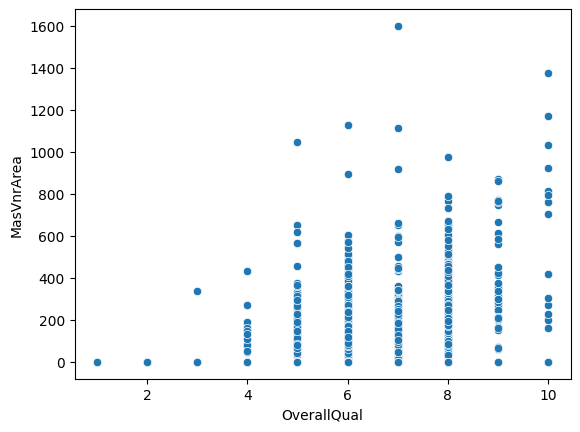

In [30]:
# Qué variables puedo usar para calcular una interpolación?
plt.figure()
sns.scatterplot(data = df,
                x = 'OverallQual',
                y = 'MasVnrArea')

<Axes: xlabel='GrLivArea', ylabel='MasVnrArea'>

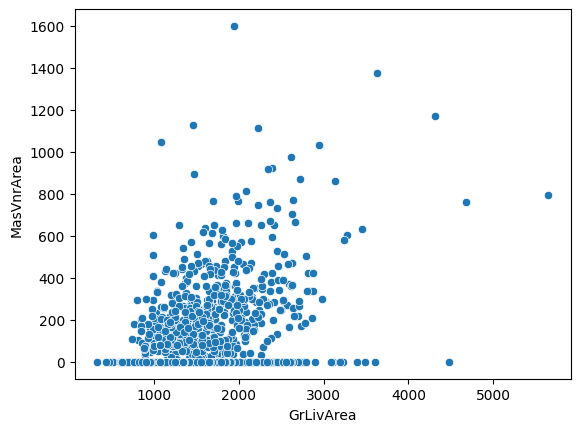

In [31]:
plt.figure()
sns.scatterplot(data = df,
                x = 'GrLivArea',
                y = 'MasVnrArea')

<Axes: xlabel='GarageArea', ylabel='MasVnrArea'>

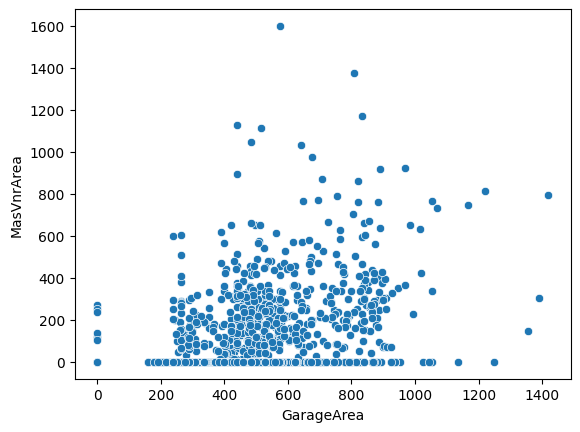

In [32]:
plt.figure()
sns.scatterplot(data = df,
                x = 'GarageArea',
                y = 'MasVnrArea')

## Interpolación Lineal

In [33]:
interpolar = df[['MasVnrArea','OverallQual','GrLivArea','GarageArea']]
df_interpolada = interpolar.interpolate(method="linear")
prefijo = "IN_lineal_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada.head()

,IN_lineal_MasVnrArea,IN_lineal_OverallQual,IN_lineal_GrLivArea,IN_lineal_GarageArea
0,196.0,7,1710,548
1,0.0,6,1262,460
2,162.0,7,1786,608
3,0.0,7,1717,642
4,350.0,8,2198,836


In [34]:
df_interpolada_2 = pd.concat([df_interpolada['IN_lineal_MasVnrArea'], interpolar], axis=1)
df_interpolada_2[df_interpolada_2['MasVnrArea'].isnull()]

,IN_lineal_MasVnrArea,MasVnrArea,OverallQual,GrLivArea,GarageArea
234,302.0,NaN,6,1960,440
529,109.5,NaN,6,2515,484
650,0.0,NaN,7,1665,562
936,54.0,NaN,7,1200,555
973,0.0,NaN,7,1428,480
977,0.0,NaN,7,1241,569
1243,40.5,NaN,10,2076,850
1278,179.5,NaN,8,2031,577


## Interpolación nearest

In [35]:
interpolar = df[['MasVnrArea','OverallQual','GrLivArea','GarageArea']]
df_interpolada = interpolar.interpolate(method="nearest")
prefijo = "IN_nearest_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_nearest_MasVnrArea,IN_nearest_OverallQual,IN_nearest_GrLivArea,IN_nearest_GarageArea
0,196.0,7,1710,548
1,0.0,6,1262,460
2,162.0,7,1786,608
3,0.0,7,1717,642
4,350.0,8,2198,836
...,...,...,...,...
1455,0.0,6,1647,460
1456,119.0,6,2073,500
1457,0.0,7,2340,252
1458,0.0,5,1078,240


In [36]:
df_interpolada_4 = pd.concat([df_interpolada['IN_nearest_MasVnrArea'], interpolar], axis=1)
df_interpolada_4[df_interpolada_4['MasVnrArea'].isnull()]

,IN_nearest_MasVnrArea,MasVnrArea,OverallQual,GrLivArea,GarageArea
234,0.0,NaN,6,1960,440
529,0.0,NaN,6,2515,484
650,0.0,NaN,7,1665,562
936,108.0,NaN,7,1200,555
973,0.0,NaN,7,1428,480
977,0.0,NaN,7,1241,569
1243,81.0,NaN,10,2076,850
1278,359.0,NaN,8,2031,577


In [38]:
# Junto toda la interpolacion
df['IN_lineal_MasVnrArea'] = df_interpolada_2['IN_lineal_MasVnrArea']
df['IN_nearest_MasVnrArea'] = df_interpolada_4['IN_nearest_MasVnrArea']
df['MasVnrArea_Vacio'] = df['MasVnrArea'].isnull()


Text(0.5, 1.0, 'Missing Values - Interpolación Lineal')

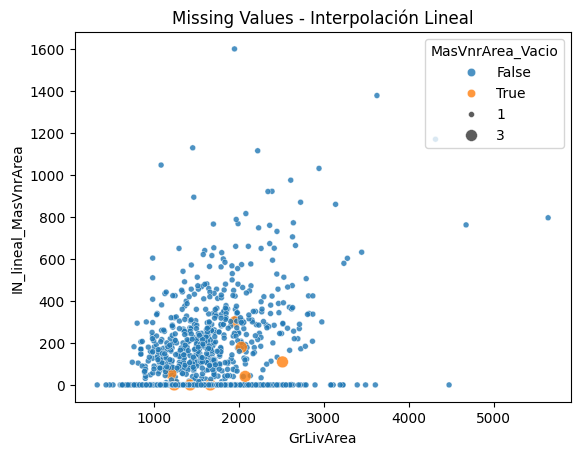

In [45]:
# Visualizo primera propuesta 

valores_tamanio = np.where(df['MasVnrArea_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df,
                x = 'GrLivArea',
                y = 'IN_lineal_MasVnrArea',
                hue = 'MasVnrArea_Vacio',
                size = valores_tamanio,
                alpha = 0.8)
    
plt.title('Missing Values - Interpolación Lineal')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano')

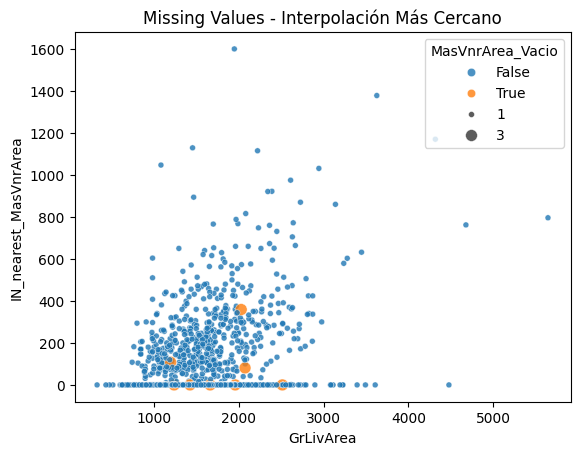

In [46]:
# Visualizo primera propuesta 

valores_tamanio = np.where(df['MasVnrArea_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df,
                x = 'GrLivArea',
                y = 'IN_nearest_MasVnrArea',
                hue = 'MasVnrArea_Vacio',
                alpha = 0.8,
                size = valores_tamanio)
plt.title('Missing Values - Interpolación Más Cercano')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano')

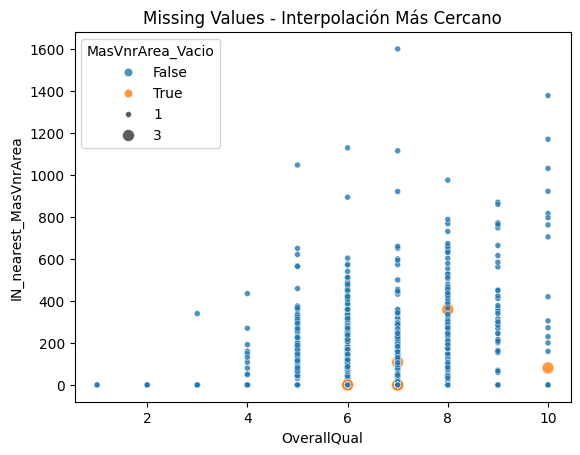

In [47]:
# Visualizo primera propuesta 

valores_tamanio = np.where(df['MasVnrArea_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df,
                x = 'OverallQual',
                y = 'IN_nearest_MasVnrArea',
                hue = 'MasVnrArea_Vacio',
                alpha = 0.8,
                size = valores_tamanio)
plt.title('Missing Values - Interpolación Más Cercano')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano')

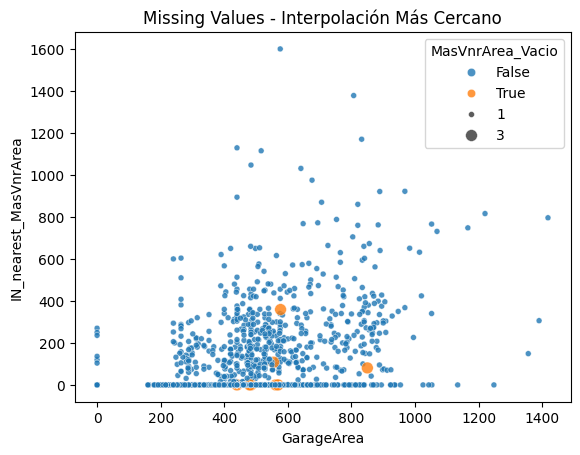

In [48]:
# Visualizo primera propuesta 

valores_tamanio = np.where(df['MasVnrArea_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df,
                x = 'GarageArea',
                y = 'IN_nearest_MasVnrArea',
                hue = 'MasVnrArea_Vacio',
                alpha = 0.8,
                size = valores_tamanio)
plt.title('Missing Values - Interpolación Más Cercano')

# Componentes Principales

In [49]:
# Selecciono variables que voy a unificar
df_PCA = df[['IN_nearest_MasVnrArea','OverallQual','GrLivArea','GarageArea']]
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IN_nearest_MasVnrArea  1460 non-null   float64
 1   OverallQual            1460 non-null   int64  
 2   GrLivArea              1460 non-null   int64  
 3   GarageArea             1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [50]:
# Importo librerias
from sklearn.decomposition import PCA

In [51]:
# Extraer la matriz de características
X = df_PCA.values

In [52]:
# Crear un objeto PCA
pca = PCA(n_components = 2)

In [53]:
# Ajustar el modelo PCA a los datos
pca.fit(X)

PCA(n_components=2)

In [54]:
# Obtener las componentes principales
componentes_principales = pca.transform(X)

In [55]:
# Crear un nuevo DataFrame con las componentes principales
df_PCA_final = pd.DataFrame(data = componentes_principales)
df_PCA_final.head()

,0,1
0,217.625276,-56.945389
1,-262.877166,-4.879762
2,298.779937,-70.877207
3,215.344789,-38.773727
4,773.287076,-245.395687


## Normalizando los datos

In [56]:
df_PCA = df[['OverallQual','GrLivArea','GarageArea']]

In [57]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)

# Sigo el paso a paso
pca = PCA(n_components = 2)

pca.fit(X)

componentes_principales = pca.transform(X)

df_PCA_final_2 = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final_2 = df_PCA_final_2.add_prefix(prefijo)
df_PCA_final_2.head()

,PC_0,PC_1
0,0.799491,0.031865
1,-0.352546,-0.272845
2,1.038916,-0.086921
3,1.052830,-0.292378
4,2.517826,-0.322355


Text(0.5, 1.0, 'Gráfico de Dispersión de las Dos Primeras Componentes Principales')

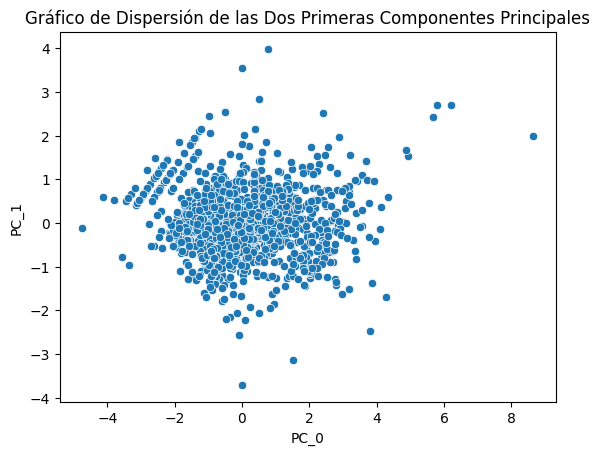

In [58]:
# Grafico de dispersión
plt.figure()
sns.scatterplot(data = df_PCA_final_2,
                x = 'PC_0',
                y = 'PC_1')
plt.title('Gráfico de Dispersión de las Dos Primeras Componentes Principales')

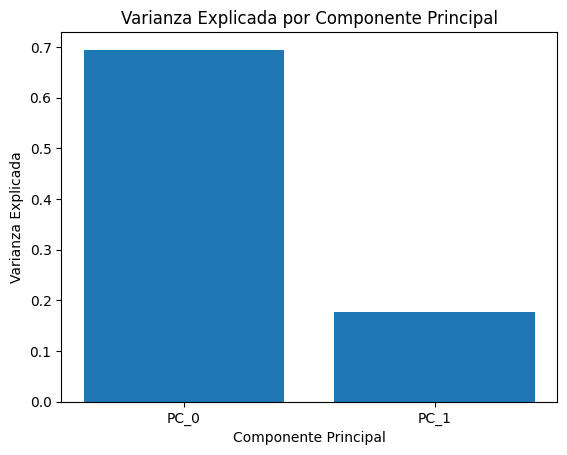

In [60]:
# Visualizar la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final_2.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()